In [1]:
from glm.glmnet import ElasticNet, GLMNet
from glm.families import Gaussian, Bernoulli
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/Users/matthewdrury/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
X = np.empty(shape=(100000, 5))
X[:, 0] = 1.0
X[:, 1] = np.random.normal(size=100000)
X[:, 2] = np.random.normal(size=100000)
X[:, 3] = 0.1*X[:, 1] + 0.9*np.random.normal(size=100000)
X[:, 4] = -0.1*X[:, 1] + 0.9*np.random.normal(size=100000)

y = 10 + 5*X[:, 1] - 20*X[:, 2] - X[:, 4] + np.random.normal(scale=0.2, size=100000)

sample_weights = np.random.uniform(size=100000)

In [3]:
s = StandardScaler()
X = s.fit_transform(X)
X[:, 0] = 1.0

In [4]:
enet = ElasticNet(lam=0.0, alpha=0.0)
enet.fit(X, y, sample_weights=sample_weights)

In [5]:
enet.coef_

array([  1.00327832e+01,   4.99412751e+00,  -2.00686517e+01,
        -3.08011408e-04,  -9.03082197e-01])

In [6]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.coef_

array([  0.00000000e+00,   4.99381725e+00,  -2.00681276e+01,
        -2.68377466e-04,  -9.03841703e-01])

In [8]:
lambdas = np.logspace(np.log10(0.000001), np.log10(50))

In [9]:
lambdas

array([  1.00000000e-06,   1.43589220e-06,   2.06178641e-06,
         2.96050303e-06,   4.25096322e-06,   6.10392494e-06,
         8.76457821e-06,   1.25849895e-05,   1.80706883e-05,
         2.59475604e-05,   3.72578996e-05,   5.34983275e-05,
         7.68178313e-05,   1.10302125e-04,   1.58381961e-04,
         2.27419422e-04,   3.26549775e-04,   4.68890276e-04,
         6.73275890e-04,   9.66751600e-04,   1.38815108e-03,
         1.99323532e-03,   2.86207105e-03,   4.10962549e-03,
         5.90097920e-03,   8.47317001e-03,   1.21665587e-02,
         1.74698668e-02,   2.50848455e-02,   3.60191341e-02,
         5.17195937e-02,   7.42637613e-02,   1.06634756e-01,
         1.53116014e-01,   2.19858091e-01,   3.15692518e-01,
         4.53300424e-01,   6.50890544e-01,   9.34608657e-01,
         1.34199728e+00,   1.92696343e+00,   2.76691176e+00,
         3.97298702e+00,   5.70478108e+00,   8.19145067e+00,
         1.17620401e+01,   1.68890217e+01,   2.42508146e+01,
         3.48215555e+01,

In [10]:
enets = []
for lam in lambdas:
    print("Next model")
    print()
    enet = ElasticNet(lam=lam, alpha=0.2)
    enet.fit(X, y)
    enets.append(enet.coef_)

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model

Next model



In [11]:
coef_paths = np.row_stack(enets)

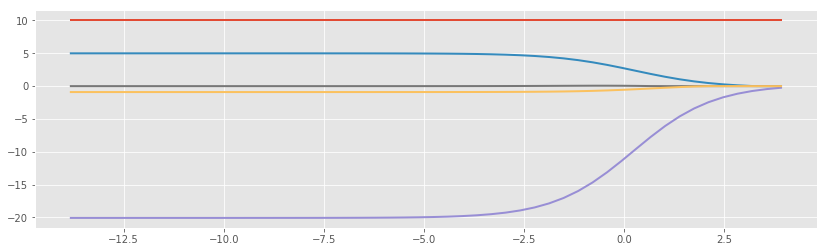

In [12]:
fig, ax = plt.subplots(figsize=(14, 4))

t = np.log(lambdas)
for idx in range(coef_paths.shape[1]):
    ax.plot(t, coef_paths[:, idx])

In [13]:
enet.predict(X)

array([ 10.29076996,   9.86744   ,   9.95708256, ...,  10.3660144 ,
        10.0027209 ,   9.7864006 ])

## GlmNet

In [14]:
lambdas = np.array([50, 45, 40, 35, 30, 20, 10, 0])

In [15]:
gnet = GLMNet(family=Gaussian(), alpha=0.2, lambdas=lambdas)

In [16]:
gnet.fit(X, y)

In [17]:
[g.coef_ for g in gnet._enets]

[array([ 10.03244288,   0.        ,  -0.24624259,   0.        ,   0.        ]),
 array([ 10.03244288,   0.        ,  -0.29989044,   0.        ,   0.        ]),
 array([ 10.03244288,   0.        ,  -0.36654383,   0.        ,   0.        ]),
 array([ 10.03244288,   0.        ,  -0.45158435,   0.        ,   0.        ]),
 array([ 10.03244288,   0.        ,  -0.56383785,   0.        ,   0.        ]),
 array([ 10.03244288,   0.06985235,  -0.95092933,   0.        ,   0.        ]),
 array([ 10.03244288,   0.35356927,  -2.04994617,   0.        ,   0.        ]),
 array([  1.00324429e+01,   5.07202701e+00,  -2.52623230e+01,
         -2.48552076e-02,  -8.75719714e-01])]

## Logit Net